In [5]:
# importing ---- 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [2]:
# loading dataset --- 
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
# splitting our dataset

x = df.drop("MedHouseVal",axis=1)
y = df["MedHouseVal"]

# using train_test_split
X_train ,X_test, y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)


In [4]:
# train our model using decision tree regressor 

# 1) without pruning -- here our model is highly overfitted
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)

y_pred1 = dtr.predict(X_train)
y_pred2 = dtr.predict(X_test)

print("r2_score_training",r2_score(y_train,y_pred1))
print("r2_score_testing",r2_score(y_test,y_pred2))

r2_score_training 1.0
r2_score_testing 0.622075845135081


In [6]:
# 2) with pre---pruning 

para_grid = {"max_depth":[2,3,4,5,6,7,8,9,10,],
             "min_samples_split":[2,10,15,20],
             "min_samples_leaf":[1,2,3,4,5,6,7]} 

grid = GridSearchCV(dtr,
                   param_grid=para_grid,
                   cv=5,
                   scoring="r2")

grid.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 10, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >

In [9]:
print("best_parameter",grid.best_params_)
print("best_score",grid.best_score_)
print("best_estimator",grid.best_estimator_)

best_parameter {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 20}
best_score 0.7192063115042573
best_estimator DecisionTreeRegressor(max_depth=10, min_samples_leaf=7, min_samples_split=20,
                      random_state=42)


r2_score_training 0.8097493799001876
r2_score_testing 0.7059851763015765


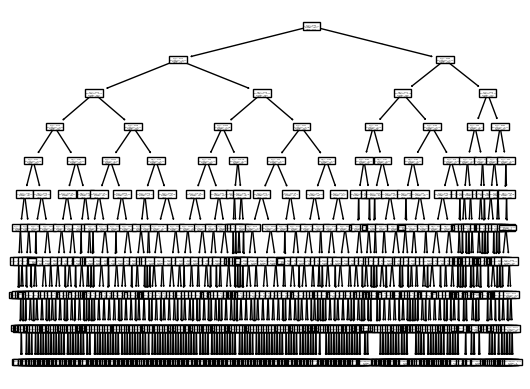

In [10]:
# final model according to preprunign -- 
pre_model = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=7,min_samples_split=20)

pre_model.fit(X_train,y_train)

y_pred1 = pre_model.predict(X_train)
y_pred2 = pre_model.predict(X_test)

print("r2_score_training",r2_score(y_train,y_pred1))
print("r2_score_testing",r2_score(y_test,y_pred2))

# still some overfitting after prepruning

plot_tree(pre_model)
plt.show()

In [11]:
# # 3) with post pruning -- 

# full_tree = DecisionTreeRegressor(random_state=42)
# full_tree.fit(X_train,y_train)

# path = full_tree.cost_complexity_pruning_path(X_train,y_train)
# ccp = path.ccp_alphas


# param_grid = {"ccp_alpha":ccp[::10]}

# cv  = GridSearchCV(estimator=full_tree,param_grid=param_grid,cv=5,scoring="r2")

# cv.fit(X_train,y_train)

In [ ]:
full_tree = DecisionTreeRegressor(random_state=42)
full_tree.fit(X_train,y_train)

path = full_tree.cost_complexity_pruning_path(X_train,y_train)
ccp = path.ccp_alphas

tree =[]
for i in ccp:
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train,y_train)
    tree.append((model,i))

best_score = 0
best_aplha = 0

for model ,i in tree:
    curr_score = r2_score(y_test,model.predict(X_test))
    if curr_score>best_score:
        best_score=curr_score
        best_aplha = i

In [10]:
# 4) Model training with Random Forest 

rf = RandomForestRegressor(
    n_estimators = 201,
    oob_score = True,bootstrap=True)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(rf.oob_score_)
print(r2_score(y_test,y_pred))

0.8105186737658459
0.8075522915762678


In [ ]:
# so here i can see over model is more stable and not overfitted 

#### Bagging classifier/Regressor - 

In [7]:
# 1) bagging regressor with decision tree

base_model = DecisionTreeRegressor(random_state=42)
bagging = BaggingRegressor(base_model,n_estimators=109)

bagging.fit(X_train,y_train)
s =bagging.predict(X_test)

print(r2_score(y_test,s))


0.807154028812525
